# 5. Predicción de ingresos de clientes usando regresión lineal

En este capítulo se resuelven problemas de negocio que requieren la predicción de cantidades. 

- La regresión es un enfoque de aprendizaje **supervisado** para predecir resultados continuos. 

- La regresión lineal es una técnica simple para el modelado predictivo. 

Las sigueintes tareas clave se implementan en el proceso de modelado:  

- Limpieza de datos
- Ingeniería de características
- Implementación de modelos de regresión lineal 
- Interpretación de resultados (información del negocio)

## Introducción

ZARA es un gran minorista de moda rápida de gama alta que opera en todo el mundo, aprobó su presupuesto de marketing para la última campaña en un país en particular. El equipo de marketing busca asignar el presupuesto a cada canal de marketing, pero tiene muchas preguntas:

- ¿Cuánto deberían gastar en email? Las tasas de lectura son bajas, pero la calidad de las conversiones es alta.
- ¿Qué hay de las redes sociales? Parece ser un canal efectivo en general.
- ¿Deberían haber alguna promoción **offline**? Si es así, ¿en qué medida?
- ¿Qué hay de Paid Search como canal?



Un gasto muy bajo en un canal con un ROI alto es un **potencial perdido**.

Un gasto alto en un canal con un ROI muy bajo es una **pérdida de recursos**.

Si la empresa pudiera modelar matemáticamente el impacto de varios canales en las ventas o, como modelar la relación entre:  
- Los gastos del canal y 
- Las ventas, 

ayudaría a predecir las ventas para cualquier asignación y en consecuencia  elegir los datos correctos. 

En ML los modelos supervisado se usan **datos históricos** que se pueden aprovechar y la máquina puede aprender. 

- En el aprendizaje supervisado, entrena a la máquina para aprender de los datos históricos y hacer predicciones. 

- Puede predecir cantidades: ingresos, precios de acciones, precios de viviendas, líneas de crédito, calificaciones de un producto, entre otros. 

- Puede predecir categorías/clases: clics en un anuncio, abandono de clientes (el cliente no regresa a un sitio web), compras de un producto, la apertura de una notificación de push promocional, el canal de tráfico preferido, otros más. 

Al utilizar los datos históricos de los clientes, se puede utilizar el aprendizaje supervisado para predecir los ingresos futuros de un cliente en función a sus actividades anteriores. 

## Problemas de regresión

La predicción de cantidades es una tarea recurrente en marketing. 

- Un ejemplo es predecir las unidades vendidas de una marca en función del gasto en visibilidad (impresiones) asignado a los productos de la marca. 

- Otro ejemplo es la predicción de ventas en función de la inversión publicitaria en campañas de televisión. 

Predecir el valor de por vida de un cliente (los ingresos totales de un cliente durante un período ) en función de los atributos de un cliente es otro ejemplo. Todas estas situaciones pueden formularse como problemas de regresión.

La regresión se refiere a una clase de problemas donde el valor a predecir es una **cantidad**. 

Hay varias técnicas dispoibles para la regresión, que van desde las más simples y fáciles de interpretar.

Desde la regresión lineal simple, hasta los enfoques de caja negra extremadamente complejos (donde la forma en que el modelo hace una predicción es prácticamente imposible de entender; como las redes neuronales profundas o métodos de conjunto como el aumento de gradiente).

Podemos pensar en los modelos como formas  matemáticamente de relaciones entre:

- objetivo/resultado/variables dependientes 
- y el predictor/característica/variables 

independientes. 

Una **variable dependiente** es la variable que se intenta predecir. 

Por ejemplo, si desea predecir los ingresos en función de los gastos de marketing en las redes sociales, los ingresos serían la variable objetivo/**dependiente**. 

Gasto en redes sociales, la variable que se utiliza para predecir los ingresos es la variable predictora/**independiente**.



Puede haber diferentes tipos de relaciones entre las variables dependientes e independientes

Las siguientes gráficas muestran relaciones lineales, donde la variable dependiente (en el eje vertical) se relaciona con la variable independiente (en el eje horizontal) de forma lineal simple: una línea en un gráfico puede describir una buena relación.


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1Ih27LtJ82UYG4Gbf3pCVz2sSd5SzZ4t3' width="800" />
<figcaption>
Figure 5.1: Regression problems</figcaption></center>
</figure>


La tercera gráfica muestra una relación no lineal más compleja, donde una curva captura mejor la relación.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1-06vIZU00zb59l55mt3tARhVGFo3V8FT' width="800" />
<figcaption>
Figure 5.2: Revenue versus social media spend</figcaption></center>
</figure>

Para el ejemplo del gasto en redes sociales, considere los datos de la Figura 5.2, donde ha trazado algunos datos hipotéticos que representan la relación entre **Ingresos** y **Gastos**: cada punto del gráfico representa algún período de tiempo en el pasado en el que se obtuvo un determinado ingreso correspondiente a la gasto en redes sociales.


Para describir matemáticamente la relación anterior, puede hacer lo siguiente:

• Predecir los ingresos para cualquier nivel de gasto en las redes sociales.
• Calcular el gasto requerido en las redes sociales para lograr los ingresos deseados.


- ¿Qué tipo de relación describe mejor los datos observados? 

Aquí es donde puede tener múltiples enfoques y, por lo tanto, necesita tomar una decisión. Mire la Figura 5.3 donde ha visualizado tres posibles elecciones de relaciones para describir los datos. 

1. Algunos de nosotros preferiríamos la línea simple (a) como un ajuste suficiente a los datos, 

2. mientras que otros preferirían la curva compleja denotada por c. 

3. Algunos pueden preferir b ya que es algo así como un equilibrio entre a y c. Las tres son opciones válidas para modelar la relación.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1jTCo1gn7DltLuGrM_5qawsz4w7GVzFns' width="800" />
<figcaption>
Figure 5.2: Revenue versus social media spend</figcaption></center>
</figure>

En este capítulo, se revisa en el **modelo Lineal Simple (a)**, es decir, describirá las relaciones usando líneas. 

Este enfoque de usar una línea para describir la relación entre el objetivo/resultado y las variables predictoras se denomina regresión lineal. Dicho de otro modo, en la regresión lineal, predice el objetivo a partir de las variables predictoras modelando su relación como una línea.


La forma matemática del modelo de regresión lineal es simple para una sola variable independiente.

<h1><center>

$y=\alpha +\beta x$     
Y = b0 + b1.X1

Formula 3.10: La ecuación de estandarización
</center></h1>

Aquí, $y$ es el valor pronosticado de la variable dependiente y $x$ representa la variable independiente. 



<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1hJ-ju3jWmnBXDCQGC3CMgRZPSBIBtBg3' width="800" />
<figcaption>
Figure 5.2: Revenue versus social media spend</figcaption></center>
</figure>



$\alpha$ (b0) es la intersección (donde la línea cruza el eje y), el resultado predicho cuando la variable independiente es 0. $\beta$ es la pendiente de la línea y captura qué tan bruscamente aumenta el valor de las variables dependientes en un cambio de unidad en la variable independiente. 

b1 también se denomina coeficiente de la variable independiente. 
- Con múltiples variables independientes, la interpretación geométrica se vuelve compleja. 


Usaremos el modelo `LinearRegression` de scikit-learn. La sintaxis es similar al enfoque de ajuste y predicción que usó para las técnicas de agrupamiento en capítulos anteriores.

 
``` py
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Luego, proporcionar las variables dependientes e independientes

lr.fit(independent_variable, dependent_variable)
```

Eso debería hacer un `fit` al modelo. Para hacer predicciones solo es necesario usar el método de predicción como se hizo en la agrupación. 

### Ejercicio 5.01: Predicción de ventas a partir del gasto publicitario mediante regresión lineal

HINA Inc. es una gran empresa de bienes de consumo masivo que está racionalizando su presupuesto de marketing. 
- Esto implica hacer un balance de todas sus estrategias de marketing. 
- Esto, a su vez, significa volver a evaluar la eficacia de su gasto actual en varios canales de marketing. 

Averiguar si gastar dinero en campañas publicitarias de televisión genera un aumento directo de las ventas.

En otras palabras, debe averiguar si el gasto en publicidad televisiva y las cifras de ventas comparten una relación lineal.

Se tienen los datos publicitarios históricos (ventas semanales y gasto en cada canal) durante casi los 4 años anteriores. 

Utilizando la regresión lineal, creará un modelo que prediga las ventas en función del gasto del canal de televisión y estudiará la relación obtenida.

1. Importar las bibliotecas relevantes para graficar y manipular datos, cargar el conjunto de datos `advertising.csv` en un DataFrame e imprimir los primeros registros.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns 

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4a/datasets1/advertising.csv -O

advertising = pd.read_csv("advertising.csv") 
advertising.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3861  100  3861    0     0  18562      0 --:--:-- --:--:-- --:--:-- 18562


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


2. Visualice la asociación entre `TV` y `Sales` a través de un diagrama de dispersión

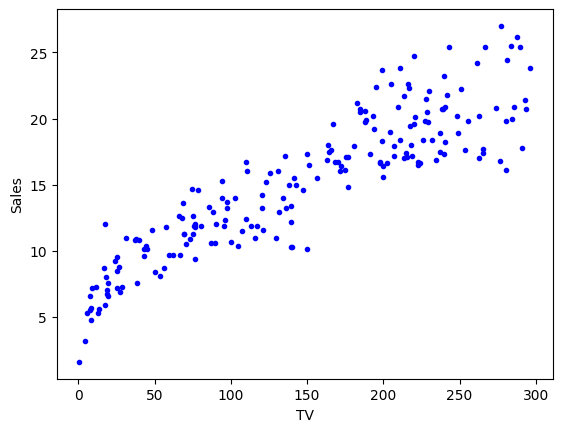

In [2]:
plt.scatter(advertising.TV, advertising.Sales, marker=".", color='blue')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

# El gasto en TV tiene una estrecha relación con Sales
# Sales parecen aumentar a medida que aumenta el gasto en televisión. 
# Usemos Sales para construir el modelo de regresión lineal.

3. Importar `LinearRegression` desde sklearn y crear una instancia

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

4. Ajustar un modelo de regresión lineal, proporcionando TV como características y Sales como resultado, usando el método de ajuste de `LinearRegression`

In [4]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression()

5. Utilizando el método de predicción del modelo, cree una variable `sales_pred` que contenga las predicciones del modelo

In [5]:
sales_pred = lr.predict(advertising[['TV']])

6. Graficar el resultado de las ventas pronosticadas con una línea sobre el diagrama  (usando el diagrama de línea simple). Esto ayuda a evaluar visualmente qué tan bien se ajusta la línea a los datos y si es una buena representación de la relación

<ipython-input-8-71a77d75d815>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(advertising.TV, sales_pred, "k--", color='red')


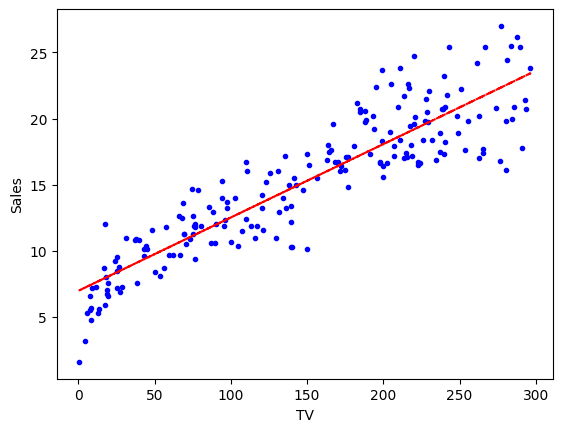

In [8]:
plt.plot(advertising.TV, sales_pred, "k--", color='red')
plt.scatter(advertising.TV, advertising.Sales, marker='.', color='blue') 
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

Tenemos una buena línea de regresión al describir la relación entre las ventas y el gasto publicitario en la televisión como canal. 

Desde la línea roja, se ve que las ventas aumentan junto con el gasto en publicidad de TV y que la publicidad de TV puede ser un predictor entre las ventas esperadas. Esto le dice a HINA Inc. que este es un gran canal para la inversión en marketing.


## Ingeniería de características (Feature Engineering) para regresión

**Raw data** es un término que se usa para referirse a los datos tal como los obtiene de la fuente, sin ninguna manipulación de su parte.

En raras ocasiones, un conjunto de Raw data se puede emplear directamente para la actividad de modelado. 
 
Cuando se realizan múltiples manipulaciones en los datos y el acto de hacerlo se denomina ingeniería de características. 

***En términos simples, la ingeniería de características es el proceso de tomar datos y transformarlos en características para usar en predicciones.***

Puede haber múltiples motivaciones para la ingeniería de características:

- Crear funciones que capturen aspectos de lo que es importante para el resultado de interés (por ejemplo, crear un valor de pedido promedio, que podría ser más útil para predecir los ingresos de un cliente, en lugar de usar la cantidad de pedidos y los ingresos totales)
- Usar su comprensión del dominio (por ejemplo, marcar ciertos indicadores de alto valor para predecir los ingresos de un cliente)
- Agregar variables al nivel requerido (por ejemplo, crear funciones a nivel de cliente para predecir los ingresos de los clientes)

Este proceso requiere experiencia en datos y conocimiento del dominio: debe saber qué se puede hacer con los datos que tiene, así como saber qué podría predecir el resultado que le interesa.

Una vez que se crean las funciones, es necesario evaluarlas no solo desde el punto de vista de un analista de datos sino también desde una perspectiva de negocio. 


### Creación de características

Para realizar una regresión, primero necesita que los datos estén en un **formato** que permita la regresión. En muchos casos, los datos se encuentran en forma de transacciones de clientes. Los datos deben transformarse en características que puedan usarse para realizar una predicción. Estas características luego se convierten en sus **predictores**.

Las características son versiones transformadas de los datos que capturan lo que cree que es posiblemente predictivo del resultado de interés. 

Supongamos que intenta predecir el valor futuro de un cliente, los ejemplos de características útiles pueden incluir: 
- la cantidad de compras que un cliente ha realizado anteriormente, 
- la cantidad que ha gastado o el tiempo transcurrido desde su último pedido.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=18g5FL4KOF-cf2B5m7vKDpyK42n0YoKK8' width="300" />
<figcaption>
Figure 5.8: Role of feature engineering in a machine learning workflow</figcaption></center>
</figure>


La figura 5.8 ilustra el papel de la ingeniería de características en un flujo de trabajo de aprendizaje automático. 

Comienza con datos sin procesar: datos que se acumulan, en el caso general, de múltiples fuentes. Los datos sin procesar rara vez conducen a la construcción de modelos. Podría tener muchos problemas: errores, imperfecciones, como valores faltantes o valores erróneos, o simplemente podría necesitar agregarse. Los datos deben limpiarse y transformarse y, a partir de la transformación, se obtienen las características del modelo. 

Luego, el modelo aprende de estas características. Las predicciones o la comprensión del modelo se emplean para tomar decisiones comerciales.


### Limpieza de datos

En general, la creación de características y la limpieza de datos van de la mano. A medida que crea sus funciones, es posible que observe problemas con los datos que deben tratarse. Los siguientes son problemas comunes que notará con los datos:

- Datos que faltan: la forma más fácil de lidiar con los datos que faltan es simplemente **eliminar** los puntos de datos a los que les faltan algunos datos si tiene sentido hacerlo. De lo contrario, puede intentar **insertar un valor** para una variable faltante en `función del promedio` o la **mediana** de los otros puntos de datos.

- Valores atípicos (Outliers): los valores atípicos son puntos de datos que se encuentran muy por fuera del rango normal de una variable o, en otras palabras, lejos de la norma. Una definición común es que un valor atípico es cualquier punto de datos que está más de tres desviaciones estándar por encima o por debajo de la mediana. Son peligrosos porque es posible que no reflejen un comportamiento normal, pero pueden tener un efecto desproporcionado en su modelo.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1b1xHAC2RgPp2D96_kpfi4ufK4lc-JZa3' width="500" />
<figcaption>Figura 5.9: Un histograma que muestra un valor atípico</figcaption></center>
</figure>


El histograma anterior muestra que para la variable $x$, la mayoría de los valores están en el Rango de 0 a 9. Pero algunos valores son mucho más altos que el resto. Estos valores se consideran valores atípicos. 

Estos pueden deberse a algún error en los datos, o valores válidos que son mucho más altos que el resto debido a alguna peculiaridad en los datos. Se recomienda que comprenda el origen de estos valores altos y elija la estrategia correcta para manejarlos, según el análisis y la importancia de estos valores altos. 

**En general, un método fácil y extremadamente común para tratar con valores atípicos es simplemente eliminarlos.**


### Ejercicio 5.02: creación de funciones para la predicción de ingresos de clientes

Zara es un gran minorista de alta costura con operaciones en varios países. Para optimizar sus actividades de marketing, Zara busca:
- identificar clientes de alto valor (clientes que se espera generen grandes ingresos para el minorista) y
- tener una estrategia de marketing diferencial para ellos. 

Usted es gerente de análisis de marketing en Zara y tiene una solución para este problema comercial. La idea clave es que se puede emplear un modelo predictivo para predecir los ingresos del cliente del próximo año en función de las compras del año anterior. Un cliente con mayores ingresos previstos es, naturalmente, un cliente de mayor valor.

Para validar este enfoque, planea crear un modelo para predecir los ingresos del cliente en 2020 en función de las compras realizadas en 2019. Si el modelo funciona bien, el enfoque se valida. Los datos de compra de 2020 se pueden usar para predecir los ingresos de los clientes para 2021 y ayudar a la empresa a identificar clientes de alto valor.

Los primeros registros se muestran en la Figura 5.10. Para cada transacción, usted tiene lo siguiente:
- Identificador de cliente (CustomerID)
- El número de unidades compradas (Quantity)
- La fecha y hora de la compra (InvoiceDate)
- El costo unitario (UnitPrice)
- Alguna otra información sobre el artículo comprado (StockCode, Description) y el cliente (Country)

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1OYah4R2o3WSWHyrqMJtrSyar8kZ9J7Wb' width="600" />
<figcaption>Figura 5.10: Registros de muestra del archivo azra_retail_transactions.csv</figcaption></center>
</figure>

El objetivo de este ejercicio es manipular los datos y crear variables que
le permite modelar el gasto del cliente para el año 2020, en función de la actividad anterior. 

Por lo tanto, 
- el gasto total de los clientes para 2020 será la variable dependiente. Las variables independientes serán características que capturan información sobre el comportamiento de compra anterior del cliente. 

Tenga en cuenta que esto también requiere la agregación de los datos para obtener un registro para cada cliente.

Más concretamente, creará las siguientes variables a partir de los datos de las transacciones:
- Revenue_2019 (ingresos totales del año 2019)
- days_since_first_purchase (la cantidad de días desde la primera compra
por el cliente)
- days_since_last_purchase (la cantidad de días desde la compra más reciente del cliente)
- number_of_purchases (el número total de compras realizadas por el cliente en 2019)
- avg_order_cost (el valor medio de los pedidos realizados por el cliente en 2019)
- Revenue_2020 (los ingresos totales del año 2020)

Revenue_2020 será la variable dependiente en el modelo, siendo el resto las variables independientes. El conjunto de datos modificado con las características creadas debería parecerse a la tabla de la Figura 5.11.



<figure>
<center><img src='https://drive.google.com/uc?export=view&id=13USNmxhqP-p-9z3mEnzusZPWGO56FBqy' width="600" />
<figcaption>Figura 5.11: El resultado esperado con las variables creadas</figcaption></center>
</figure>

Realice los siguientes pasos para completar este ejercicio. 

1. Importar librerias pandas y cargar los datos de `retail_transactions`.csv en un DataFrame llamado `df`, luego imprima los primeros cinco registros del DataFrame. Además, importar el módulo de `datetime`

In [9]:
import pandas as pd
import datetime as dt

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4a/datasets1/azra_retail_transactions.csv -O

df = pd.read_csv('azra_retail_transactions.csv') 
df.head()

# Los primeros cinco registros que se muestran contienen la misma información que
# la tabla de la figura 5.10. Esto confirma que los datos se han cargado correctamente.
# InvoiceDate tiene la fecha y la hora al minuto de la factura.
# El time de la factura es demasiada información, y podemos trabajar solo con la parte de la time. 

# Además, tener en cuenta que tenemos el precio unitario y la cantidad del artículo,
# no tenemos un valor de transacción total (ingresos) para la transacción. 

# Podemos obtener esto simplemente multiplicando el precio unitario por la cantidad del artículo.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34.2M  100 34.2M    0     0  40.5M      0 --:--:-- --:--:-- --:--:-- 40.4M


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


2. Conviertir la columna `InvoiceDate` al formato de fecha utilizando el método to_datetime

In [17]:
# para revisar que se cambie el tipo de dato
df.info()

# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18532 entries, 536365 to 581587
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   revenue      18532 non-null  float64
 1   InvoiceDate  18532 non-null  object 
 2   CustomerID   18532 non-null  float64
dtypes: float64(2), object(1)
memory usage: 579.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18532 entries, 536365 to 581587
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   revenue      18532 non-null  float64       
 1   InvoiceDate  18532 non-null  datetime64[ns]
 2   CustomerID   18532 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 579.1 KB


3. Calcular los ingresos de cada fila multiplicando `Quantity` por `UnitPrice`. Imprimir los primeros cinco registros del conjunto de datos para verificar el resultado

In [11]:
df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

# Los ingresos parecen calcularse correctamente como un producto de los 
# valores de las columnas Precio por unidad y Cantidad.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


4. En el conjunto de datos, cada factura podría distribuirse en varias filas, una para cada tipo de producto comprado (ya que la fila es para cada producto y un cliente puede comprar varios productos en un pedido). 

Estos se pueden combinar de manera que los datos de cada transacción estén en una sola fila. Para hacerlo, realice una operación groupby en InvoiceNo. Sin embargo, antes de eso, debe especificar cómo combinar esas filas que están agrupadas.

In [12]:
operations = {'revenue':'sum',\
              'InvoiceDate':'first',\
              'CustomerID':'first'}
df = df.groupby('InvoiceNo').agg(operations)

# Primero especifica las funciones de groupby que usará para cada columna y 
# luego realiza una operación de agrupación. 

# InvoiceDate y CustomerID serán los mismos para todas las filas de la misma factura,
# por lo que solo puede tomar la primera entrada para ellos. 

# Para los ingresos, debe sumar los ingresos de todos los artículos de la misma 
# factura para obtener los ingresos totales de esa factura.

5. Finalmente, use la función head para mostrar el resultado:

In [15]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


6. Usará el año de la transacción para derivar características para 2019 y 2020. Cree una columna separada llamada `year` para el año. Para hacer eso, use el atributo de `year` de la columna `InvoiceDate`

In [18]:
df['year'] = df['InvoiceDate'].dt.year # ojo paso 2.
df['year']

InvoiceNo
536365    2019
536366    2019
536367    2019
536368    2019
536369    2019
          ... 
581583    2020
581584    2020
581585    2020
581586    2020
581587    2020
Name: year, Length: 18532, dtype: int64

7. Para cada transacción, calcule cuántos días de diferencia hay entre el último día de 2019 y la fecha de la factura utilizando el siguiente código.

In [19]:
df['days_since'] = (dt.datetime(year=2019, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)
df['days_since'] 

InvoiceNo
536365     29
536366     29
536367     29
536368     29
536369     29
         ... 
581583   -345
581584   -345
581585   -345
581586   -345
581587   -345
Name: days_since, Length: 18532, dtype: int64

8. A continuación, cree las funciones para los días desde la primera y la última compra, junto con el número de compras y los ingresos totales para 2019. 

  Definir un conjunto de funciones de agregación para cada una de las variables usando el método groupby. 

  Calcular:
   - la suma de los ingresos. Para la columna `days_since`,
   - calcular el número máximo y mínimo de días, 
   - así como el número de valores únicos (dándole cuántos días separados este cliente realizó una compra).

   Dado que estos son los predictores, almacenar el resultado en una variable, X

In [20]:
operations = {'revenue':'sum',\
              'days_since':['max','min','nunique']}
X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)

9. Ahora, usa la función head para ver los resultados

In [21]:
X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

Como puede ver en la figura anterior, debido a que realizó varios tipos de agregaciones (aggregation) en la columna `days_since`, terminó con etiquetas de columna (EN EL HEADER) de varios niveles.

10. Para simplificarlo, hay que restablecer los nombres de las columnas para que sea más fácil consultarlas más adelante.

In [22]:
X.columns = [' '.join(col).strip() for col in X.columns.values]
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


11. Obtener el gasto promedio por pedido. Calcular esto dividiendo la suma de ingresos por `days_since nunique` (tenga en cuenta que este es el gasto promedio por día. Para simplificar, suponga que un cliente solo hace un pedido en un día):

In [23]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

12. Necesitamos el resultado que va a predecir, que es solo la suma de los ingresos para 2020. Calcule esto con una operación simple de agrupación y almacene los valores en la variable

In [24]:
y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

13. Coloque sus predictores y resultados en un solo DataFrame, `wrangled_df`, y cambiar el nombre de las columnas para que tengan nombres más intuitivos.

In [25]:
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df 

,revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost,revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,180.60
18281.0,NaN,NaN,NaN,NaN,NaN,80.82
18282.0,NaN,NaN,NaN,NaN,NaN,178.05


In [26]:
wrangled_df.columns = ['revenue_2019',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'number_of_purchases',
                       'avg_order_cost',
                       'revenue_2020']

wrangled_df.head()

# Muchos de los valores del DataFrame son NaN. 
# Esto se debe a clientes que estuvieron activos solo en 2019 o solo en 2020, 
# por lo que no hay datos para el otro año. 

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


14. Para descartar los clientes sin valores, elimine las filas donde cualquiera de las columnas de ingresos es nulo

In [27]:
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

15. El paso final de limpieza de datos. A menudo es una buena idea deshacerse de los valores atípicos. 

  **Una definición estándar es: Un valor atípico es cualquier punto de datos con más de tres desviaciones estándar por encima de la mediana.**

  Utilizar estos criterio para descartar clientes que son atípicos en términos de ingresos de 2019 o 2020


In [28]:
wrangled_df = wrangled_df[wrangled_df.revenue_2020 \
              < ((wrangled_df.revenue_2020.median()) \
              + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 \
              < ((wrangled_df.revenue_2019.median()) \
              + wrangled_df.revenue_2019.std()*3)]

16. Otra buena idea es después de haber realizado la limpieza de datos y la ingeniería de características, guardar los datos nuevos como un archivo nuevo, de modo que, mientras desarrolla su modelo, no necesite ejecutar los datos a través de toda la ingeniería de funciones y la *pipeline* de limpieza cada vez que desee volver a ejecutar el código. 

Puede hacer esto usando la función to_csv.

In [29]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


## Evaluación de funciones mediante visualizaciones y correlaciones

El siguiente paso es evaluar las características. 

Las motivaciones para la evaluación son:

- Garantizar que los valores estén dentro de los rangos esperados
- comprender mejor las columnas individuales, 
- comprender las asociaciones entre las características y patrones en los datos. 
 
Una proceso sujerido es el siguiente:

1. Hacer un **Sanity check** de las características para asegurarse de que sus valores sean los que esperaría. Puede graficar un histograma de cada función para asegurarse de que la distribución de la función también sea la esperada. Esto a menudo puede revelar problemas inesperados con sus datos, por ejemplo, la presencia del valor 1000 en un campo que se supone que solo tiene valores verdaderos o falsos.

2. Examinar las relaciones entre sus características y el resultado de interés. Esto se puede hacer de las siguientes dos maneras:

  a) Creación de diagramas de dispersión: A menudo, el medio más efectivo para evaluar una relación es crear un diagrama de dispersión que represente una característica contra el resultado de interés y ver si existe alguna relación obvia.

  b) Evaluar correlaciones: Otro método rápido y efectivo para evaluar una relación es ver si existe una correlación entre las variables. Una correlación es una cuantificación de la asociación lineal entre dos variables. Las correlaciones pueden ser positivas, lo que significa que a medida que aumenta una variable, aumenta la otra. Por ejemplo, espera que las ventas tengan una correlación positiva con el gasto en marketing. Una correlación también puede ser negativa, es decir, cuando una variable aumenta de valor, la otra disminuye. Como ejemplo, espera que los clientes con hipotecas más altas gasten menos en una plataforma de artículos de lujo.

El valor de correlación cuantifica la asociación entre las variables en un solo número. La magnitud y el signo del valor nos informan sobre la naturaleza de la asociación, o falta de ella, entre las variables.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1ATWqM6QMb8u3Ig_oOAANkCf0ivuJn_ji' width="500" />
<figcaption>Figura 5.19: Una visualización de los diferentes niveles de correlación</figcaption></center>
</figure>


```
La figura 5.19 muestra varias relaciones en diagramas de dispersión y sus valores de correlación correspondientes. En la Gráfica 1, X e Y tienen una relación lineal perfecta con Y aumentando con X. El valor de correlación para esta relación es 1, el valor más alto posible correspondiente a una correlación positiva perfecta. El otro extremo es la Gráfica 7, donde X e Y tienen una correlación negativa perfecta con un valor de
-1. Y disminuye a medida que X aumenta. Tanto en la Gráfica 1 como en la 7, la relación podría estar bien descrita por una línea en la que ningún punto se desviaría de esa línea. La parcela 2 es un caso con una fuerte correlación positiva también. Pero esta vez, si dibujara una línea para la relación, algunos puntos se desviarían de la línea. Las desviaciones serían pequeñas pero presentes. El valor de correlación, por lo tanto, no es 1 pero es un valor alto cercano a 1. En la Gráfica 3, Y aumenta con X, pero los puntos se desviarían significativamente de una línea. El valor de correlación es 0,5, lo que significa una correlación positiva pero débil. Los gráficos 5 y 6 tienen patrones similares a los de 2 y 3 respectivamente, aunque con una asociación negativa entre X e Y. Cuando no hay relación entre X e Y, es decir, los cambios en X no tienen impacto en Y, se obtiene un gráfico como Parcela 4. El valor de correlación para dicha relación, o la falta de ella, es 0. La correlación se puede calcular fácilmente usando paquetes estadísticos, lo que da como resultado un solo número que a menudo puede revelar si existe una fuerte relación entre dos variables.

```



El cálculo de la correlación en Python se puede hacer de muchas maneras. Uno de los enfoques más simples es a través del método `corr` de pandas DataFrame.


```py
df.corr()
```

Si solo desea calcular la correlación entre dos series/listas/matrices de números, puede usar la función corrcoef de la biblioteca numpy. 

El siguiente comando muestra cómo importar numpy y calcular la correlación entre dos variables, var1 y var2:

```py
import numpy as np
np.corrcoef(var1, var2)
```

var1 y var2 podrían ser Series de pandas, matrices NumPy o listas


La **correlación** es una medida extremadamente útil de la asociación entre dos variables cuantitativas. La magnitud y el signo del valor de correlación pueden revelar la asociación entre variables. 

Un valor cercano a 0 significaría que no existe correlación entre las variables, mientras que magnitudes cercanas a 1 indican asociaciones fuertes. El signo del coeficiente de correlación te dice si ambas variables aumentan juntas.

### Ejercicio 5.03: Examen de las relaciones entre los predictores y el resultado

En el ejercicio anterior, transformamos los datos de las transacciones de Zara sin procesar en un conjunto de datos transformado que tiene funciones dependientes e independientes útiles que se pueden usar para la creación de modelos.

Identificaremos cómo las diferentes funciones relacionadas con el historial de compras afectan los ingresos futuros del cliente. 
Esto también nos ayudará a evaluar si las asociaciones en los datos tienen sentido comercial.

Usararemos diagramas de dispersión para visualizar las relaciones y usará correlaciones para cuantificarlas.

1. Use pandas para importar los datos que se guardó al final del último ejercicio (`wrangled_transactions.csv`). El campo `CustomerID` no es necesario para el análisis. Asigne `CustomerId` como índice para DataFrame

In [30]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

2. Utilizando un plot del DataFrame, hacer un diagrama de dispersión con `days_since_first_purchase` en el eje x e `revenue_2020` en el eje y para examinar la relación entre ellos:

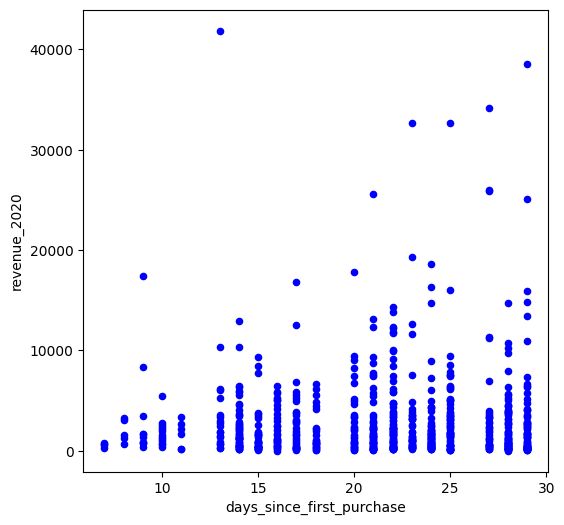

In [31]:
df.plot.scatter( x="days_since_first_purchase", y="revenue_2020", figsize=[6,6], color='blue')
plt.show()

# Se puede ver que no existe una correlación muy fuerte entre ellos, en general, 
# vemos instancias más altas de ingresos altos para clientes con una permanencia
# más alta (un valor más alto para days_since_first_purchase).

3. Utilizando la función de `pairplot` de seaborn, crear diagramas de dispersión por pares de todas las características.

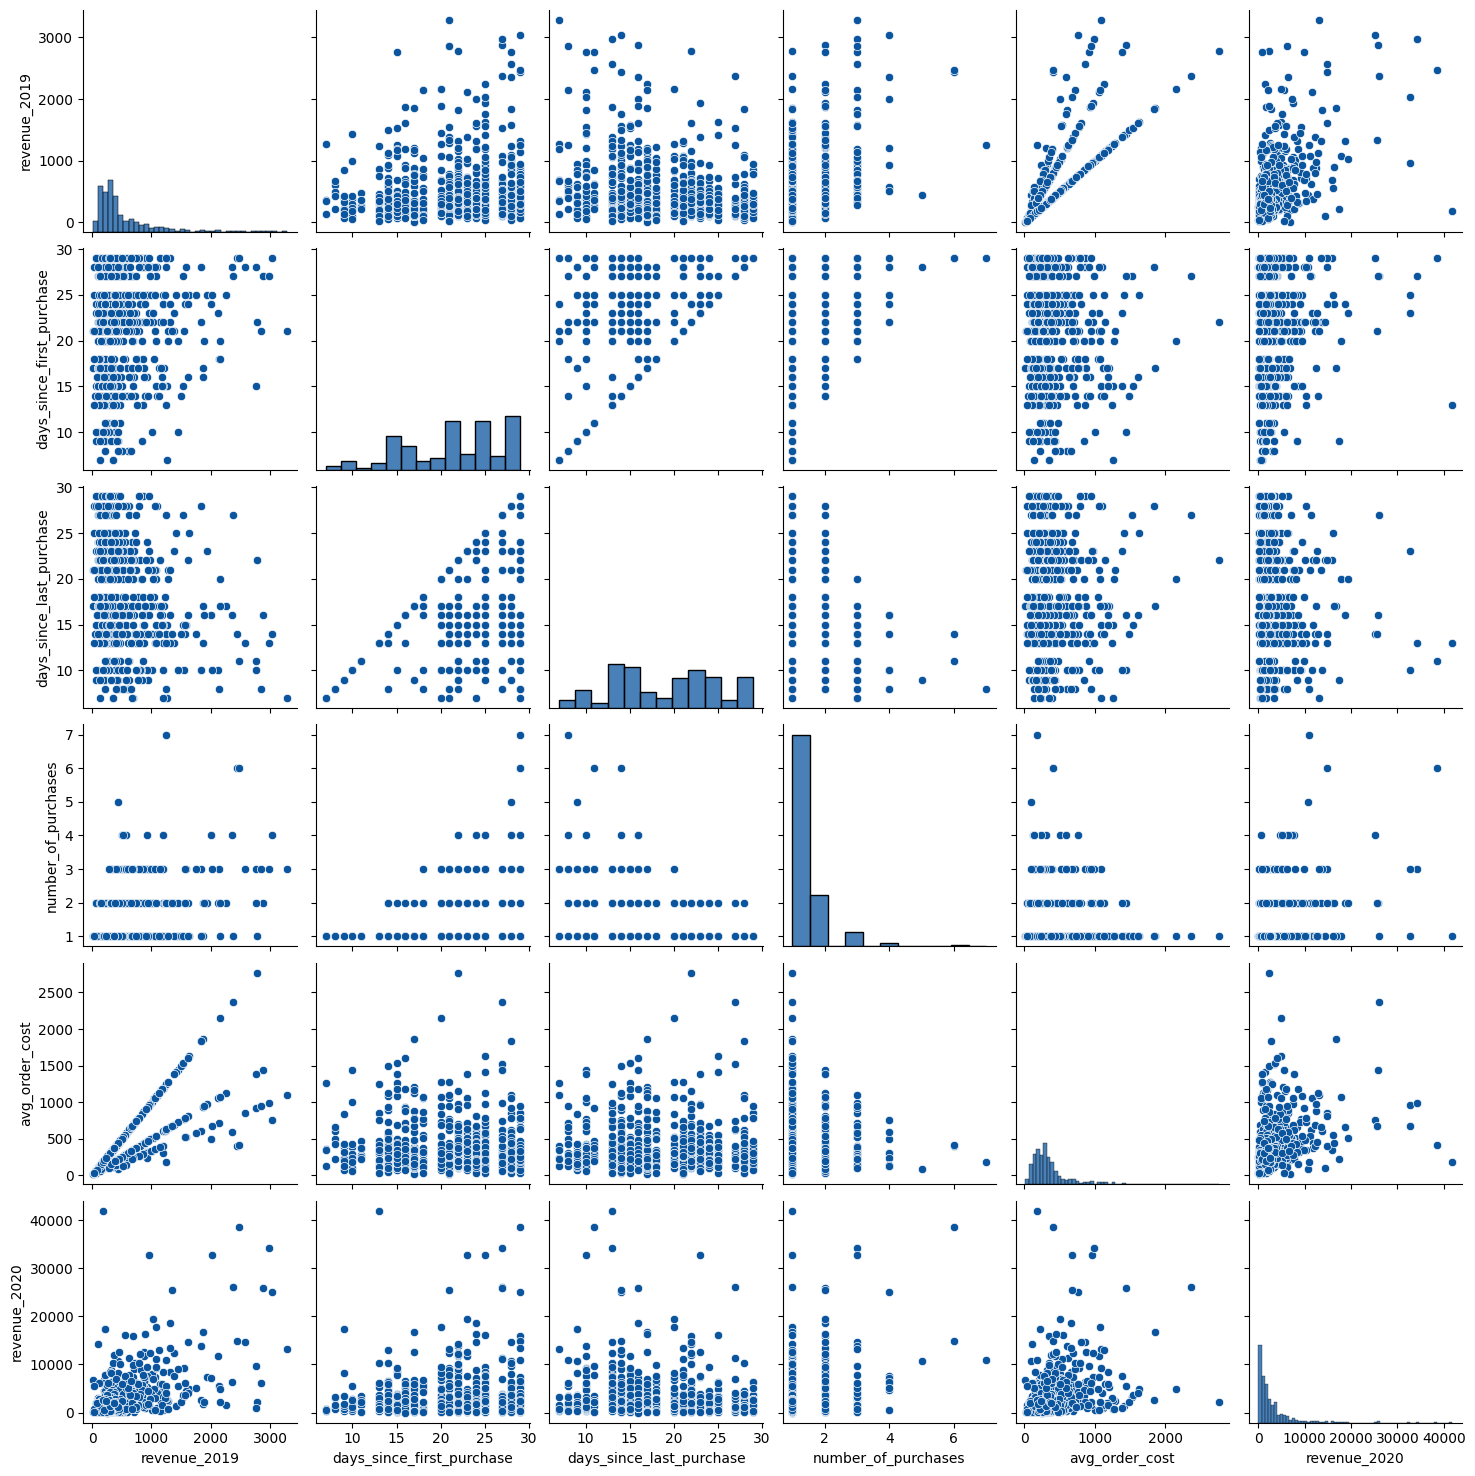

In [ ]:
import seaborn as sns
sns.set_palette('Blues_r')
sns.pairplot(df)
plt.show()

En la Figura 5.21, la diagonal muestra un histograma para cada variable, mientras que cada fila muestra el diagrama de dispersión entre una variable y otra variable. La fila inferior de las figuras muestra los diagramas de dispersión de los ingresos de 2020 (nuestro resultado de interés) frente a cada una de las otras variables.

 Debido a que los puntos de datos se superponen y existe una gran cantidad de variación, las relaciones no se ven muy claras en las visualizaciones.

4. Usando la función `pairplot` y el parámetro `y_vars`, limite la vista a la fila de su variable objetivo, es decir, Revenue_2020:

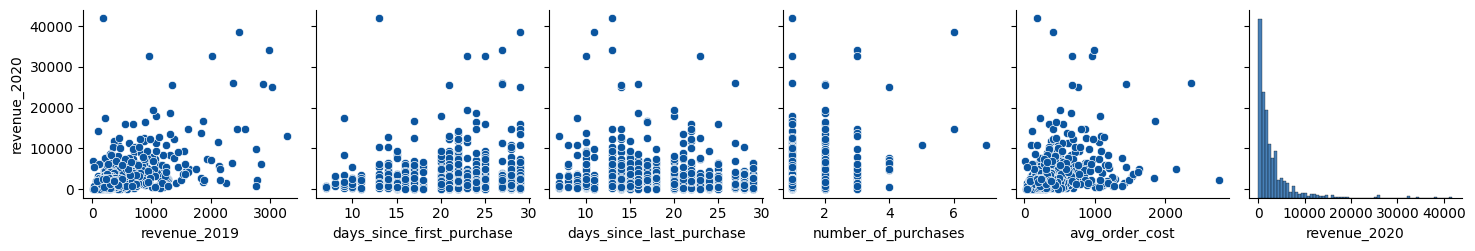

In [ ]:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

Desde este punto de vista centrado en las asociaciones entre Revenue_2020 y las variables independientes, evalúa visualmente que ninguno de los predictores tiene una relación fuerte con los ingresos de los clientes para 2020. La relación más fuerte parece ser con los ingresos_2019 y es una relación positiva.

5. Luego, use correlaciones para cuantificar las asociaciones entre las variables. Use el método `corr` en pandas `DataFrame`

In [32]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Una vez más, puede mirar la última fila para ver las relaciones entre sus predictores y el resultado de interés (ingresos de 2020). 

Los números positivos indican una relación positiva; por ejemplo, cuanto mayores sean los ingresos de 2019 de un cliente, mayores deberían ser los ingresos esperados de ellos en 2020. Los números negativos significan lo contrario; por ejemplo, cuantos más días hayan pasado desde la última compra de un cliente, menos esperaría
los ingresos de 2020 de ellos para ser. Los valores de correlación concuerdan con la evaluación visual de que Revenue_2019 tiene la relación más fuerte con Revenue_2020.

En este ejercicio, se vió cómo puede usar las correlaciones para cuantificar las asociaciones entre variables. El valor único de la correlación puede decirnos acerca de la fuerza
así como la naturaleza de la relación es decir, si se mueven en la misma
o direcciones opuestas (una aumenta mientras que la otra disminuye). 

### Actividad 5.01: Examen de la relación entre la ubicación de la tienda y los ingresos

El gigante de la moda ZARA también tiene varias tiendas minoristas físicas donde los clientes pueden probar y comprar ropa y accesorios de moda. Con una mayor penetración de Internet y una mayor adopción del comercio electrónico entre los clientes, la afluencia a las tiendas físicas ha ido disminuyendo. Para optimizar los costos de operación, la empresa desea comprender los factores que afectan los ingresos de una tienda. Esto les ayudará a recibir mejores llamadas con respecto a la creación de futuras tiendas y la toma de decisiones sobre las existentes.
Los datos de la actividad se encuentran en el archivo `location_rev.csv`. El archivo tiene datos sobre varias ubicaciones de tiendas e información sobre el área circundante. Esta información incluye lo siguiente:

- revenue (los ingresos de la tienda en cada ubicación)
- location_age (la cantidad de años desde que abrió la tienda)
- num_competitors (el número de competidores en un radio de 20 millas)
- median_income (la mediana de ingresos de los residentes en el área)
- num_loyalty_members (los miembros inscritos en el programa de lealtad en el área)
- population_density (la densidad de población del área)

El objetivo de la actividad es utilizar los datos para descubrir algunas perspectivas comerciales que ayudarán a la empresa a decidir las ubicaciones de sus tiendas. 

Visualizará las diferentes asociaciones en los datos y luego las cuantificará mediante correlaciones. 
Interpretarás los resultados y responderás algunas preguntas pertinentes al negocio:
- ¿Qué variable tiene la asociación más fuerte con los ingresos?
- ¿Todas las asociaciones son intuitivas y tienen sentido comercial?

1. Importar las bibliotecas pandas, pyplot de matplotlib y seaborn. Leer los datos en un DataFrame (df) e imprima los primeros cinco registros usando el siguiente código:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns 

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4a/datasets1/location_rev.csv -O

df = pd.read_csv('location_rev.csv')
df.head()

# El df los ingresos de la tienda, su antigüedad, 
# junto con varios campos sobre la ubicación de la tienda. 
# A partir de los cinco registros principales, 
# obtiene una idea del orden de los valores para las diferentes columnas. 

# Observa que los valores de los ingresos son del orden de decenas de miles, 
# al igual que la mediana de los ingresos. Asimismo, anota la escala y
# algunos valores de muestra de las columnas.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40441  100 40441    0     0   208k      0 --:--:-- --:--:-- --:--:--  207k


,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


2. Cree gráfico de dispersión entre la mediana de los ingresos y los ingresos de la tienda utilizando el método de gráfico:

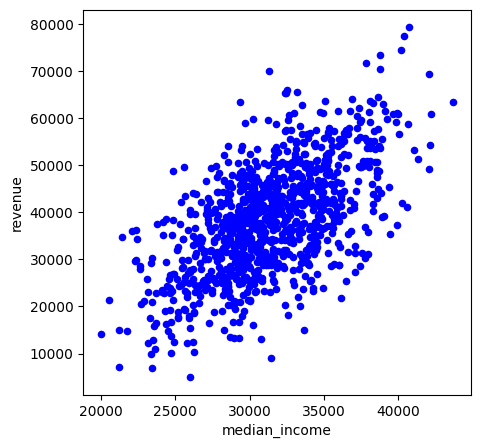

In [34]:
df.plot.scatter("median_income", 'revenue', figsize=[5,5], color='blue')
plt.show()

# Parece haber una asociación decente entre las dos variables. 
# Examinemos las otras asociaciones en los datos.

3. Utilice la función pairplot de seaborn para visualizar los datos y sus relaciones:

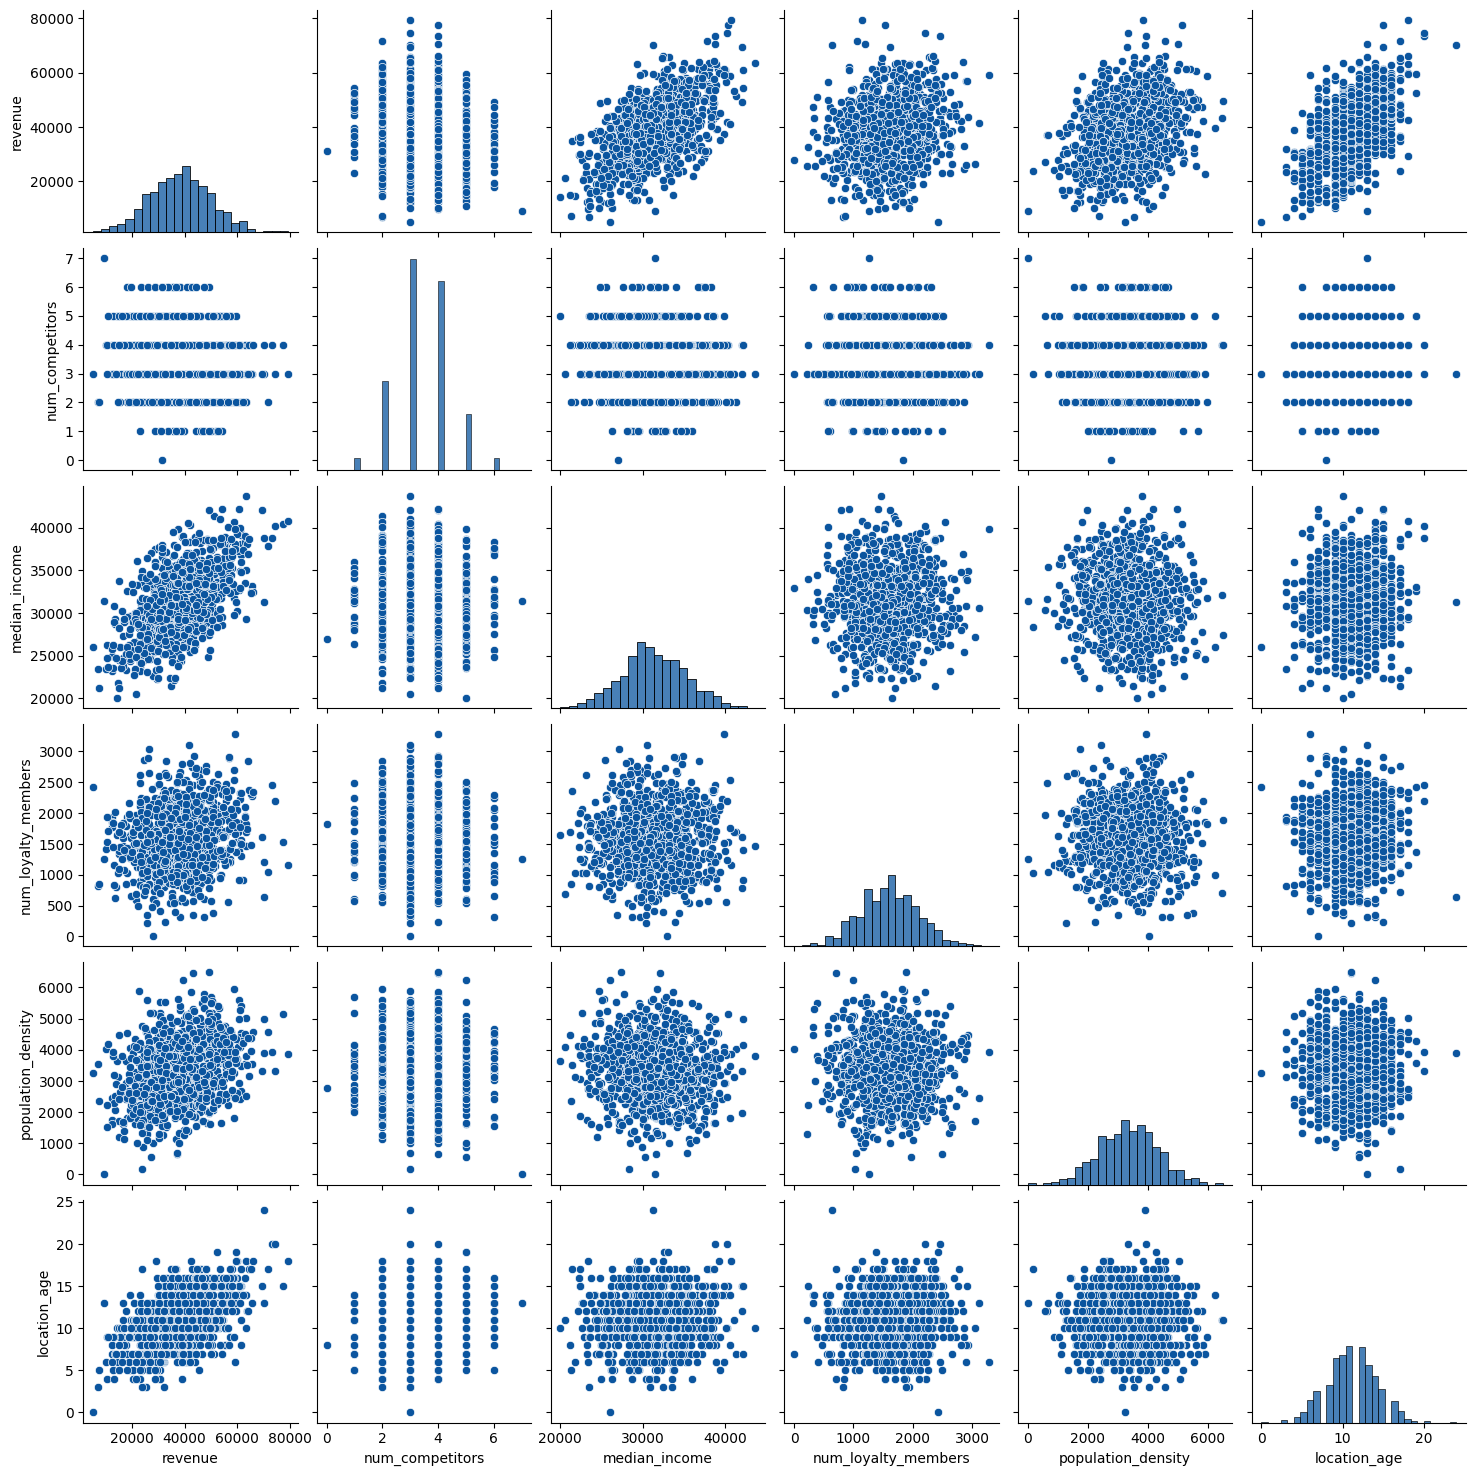

In [35]:
sns.set_palette('Blues_r') 
sns.pairplot(df) 
plt.show()

El gráfico de pares produce gráficos de dispersión para todas las combinaciones posibles de variables. Tenga en cuenta que solo hay unos pocos casos en los que existe una asociación decente entre cualquier par de variables. Las relaciones más fuertes parecen darse entre revenue y ubicaciólocation_agen_edad, e revenue y median_income.

4. Con el parámetro `y_vars`, trace la fila para las asociaciones con la variable de ingresos:

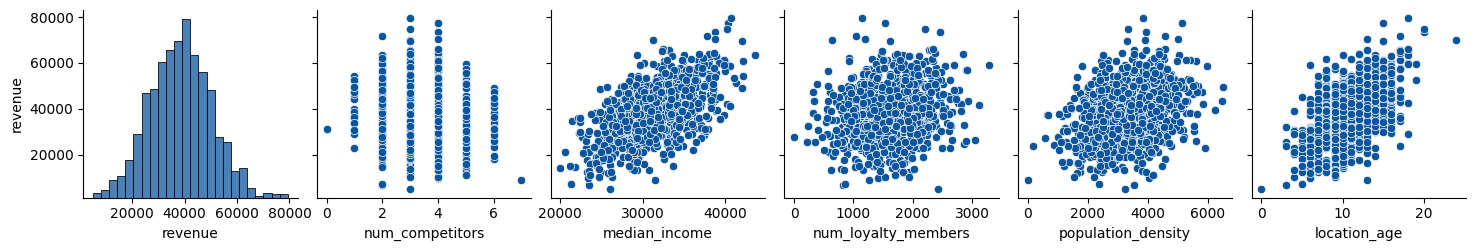

In [36]:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue")
plt.show()

# Desde esta vista centrada en los ingresos, verá que los ingresos tienen 
# asociaciones decentes con las variables location_age y median_income. 
# Un valor numérico ayudará a identificar cuál de ellos es más fuerte.

5. Finalmente, use correlaciones para revisar la relación entre las diferentes variables y los ingresos por ubicación:

In [37]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


Como puede ver en la figura anterior, la correlación más alta de `revenue` es con `median_income`. Al observar las magnitudes y los signos, puede evaluar si los resultados tienen sentido comercial. 

Cuantos más competidores haya en la zona, cuanto menor sea el ingreso de esa ubicación. Además, puede observar que el ingreso medio, los miembros leales y la densidad de población están relacionados positivamente. La edad de una ubicación también se correlaciona positivamente con los ingresos, lo que indica que cuanto más tiempo esté abierta una ubicación, más conocida será y atraerá a más clientes (o tal vez, solo las ubicaciones a las que les va bien duran mucho tiempo).

## Realización e interpretación de la regresión lineal

En el Ejercicio 5.01, implementamos y vimos el resultado de un modelo de regresión lineal sin discutir el funcionamiento interno. 

Comprendamos mejor la técnica de la regresión lineal ahora. La regresión lineal es un tipo de modelo de regresión que predice el resultado mediante relaciones lineales entre los predictores y el resultado. Los modelos de regresión lineal se pueden considerar como una línea que atraviesa el espacio de características que minimiza la distancia entre la línea y los puntos de datos.

El modelo que aprende una regresión lineal es la ecuación de esta recta. Es una ecuación que expresa la variable dependiente como una función lineal de las variables independientes. Esto se visualiza mejor cuando hay un solo predictor (ver Figura 5.28). En tal caso, puede dibujar una línea que mejor se ajuste a los datos en un diagrama de dispersión entre las dos variables.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1105Uu9lGSW0aK-XrydtqYTTVeldfrJGd' width="500" />
<figcaption>Figura 5.28: Visualización de una línea de regresión lineal ajustada a los datos</figcaption></center>
</figure>

La línea se genera tratando de encontrar la línea de mejor ajuste. Esta será la línea que mejor minimice el error (diferencia) entre ella y los puntos de datos.

Uno de los grandes beneficios de la regresión lineal es que es un modelo extremadamente simple. El modelo se puede describir en una ecuación simple, como sigue:

$y = b_0 + b_1 X_1 + b_2 x_2 ... b_i x_i$

Aquí, $y$ es el valor pronosticado de la variable de resultado, $b_0$ es la intersección (donde la línea cruza el eje x), cada $X$ es el valor de una variable y cada $b$ es el peso respectivo asignado a esa variable.

### Ventajas de la regresión lineal
- Modelo fácil de interpretar. 
- Al observar los coeficientes, puede ver fácilmente cuánto podría predecir que cambiaría Y por cada cambio de unidad en el predictor. 

Por ejemplo, si tuviera un modelo que predijera los ingresos por ventas de cada cliente para el próximo año y el coeficiente para el predictor del número de compras en el año anterior fuera 10, podría decir que para cada compra en el año anterior, podría esperar el los ingresos de un cliente sean $10 más altos.

### Desventajas de la regresión lineal

- Solo pueden modelar relaciones lineales, mientras que las relaciones en el mundo real suelen ser más complejas. 

- Los modelos lineales asumen que no importa qué tan alto sea el valor de un predictor, agregar más tendrá el mismo efecto que si el predictor fuera más bajo.

Además de las relaciones no lineales, los modelos lineales no pueden capturar fácilmente las interacciones entre variables. En estadística, la interacción es una situación en la que, cuando se combinan dos variables, su efecto es mayor (o menor) que la suma de su efecto solo. 

Por ejemplo, podría darse el caso de que, si bien los anuncios de televisión y los anuncios de radio tienen un efecto positivo en las ventas en un área cuando ambos se realizan a la vez, la suma de su efecto es menor que el efecto que tendría cada uno solo debido a la saturación de la oferta. el mercado con anuncios. Los modelos lineales no tienen una forma integrada de tratar con este tipo de efectos, ya que asumen una relación lineal simple entre los predictores y el resultado.

Esto no significa que los modelos lineales sean completamente incapaces de dar cuenta de las relaciones o interacciones no lineales. Al realizar transformaciones en los predictores, una relación no lineal se puede convertir en una lineal y los términos de interacción se pueden crear multiplicando dos predictores; estos términos pueden luego ser agregados
al modelo Sin embargo, esto puede ser difícil y requiere mucho tiempo y aumenta la complejidad del modelo, lo que hace que sea más difícil de interpretar, eliminando así muchos de los beneficios del uso de modelos lineales, para empezar.


Para la implementación de Python, usaremos `LinearRegression` del paquete scikit-learn. El objeto `LinearRegression` en scikit-learn sigue una sintaxis idéntica a la que usamos para la agrupación en clústeres anteriormente. Usamos el método de ajuste para entrenar el modelo con los datos proporcionados. Los siguientes comandos importarán LinearRegression, crearán una instancia y la ajustarán a los datos proporcionados (variables independientes y dependientes):

```py
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)
```



Aquí, `X_train` contiene las variables independientes y `y_train` contiene la variable dependiente.
Después de ajustar el modelo, se pueden hacer predicciones sobre cualquier dato nuevo simplemente usando el método de predicción del modelo y almacenándolo en una variable, como se muestra en el siguiente comando:

```
predictions = model.predict(new_data)
```



En el código anterior, las predicciones variables contendrán el resultado previsto para cada registro en `new_data`. Una vez entrenado el modelo, los coeficientes de las diferentes variables independientes están disponibles en el atributo `coef_` del modelo. Los valores se pueden mostrar usando el siguiente comando:

```
model.coef_
```

La intersección de la ecuación de regresión lineal está disponible en el atributo intercept_ y se puede mostrar con el siguiente comando:

```
model.intercept_
```





### Ejercicio 5.04: Construcción de un modelo lineal que predice el gasto del cliente

Predecir los ingresos futuros de un cliente basándose en transacciones pasadas es un problema clásico que puede resolver la regresión lineal. En este ejercicio, creará un modelo de regresión lineal para predecir los ingresos de los clientes para 2020 para la empresa de alta costura ZARA. En los ejercicios anteriores, realizó ingeniería de características para preparar los datos para el modelado y analizó las relaciones en los datos. Ahora, mediante la regresión lineal, creará un modelo que describa cómo se relacionan los ingresos futuros con las funciones en función de transacciones pasadas.

Entrenará un modelo de regresión lineal con `Revenue_2020` como variable dependiente y el resto de las variables como variables independientes. 

Se usará el enfoque de prueba de entrenamiento para asegurarse de entrenar el modelo en parte de los datos y evaluarlo en los datos de prueba no vistos. Interpretará los coeficientes del modelo entrenado y verificará si tienen sentido comercial. Para evaluar matemáticamente el rendimiento del modelo, verificará la correlación entre los valores pronosticados de `Revenue_2020` y los valores reales. Una mayor correlación indicaría un mayor rendimiento del modelo.

1. Importe pandas y numpy usando el siguiente código:

In [46]:
import pandas as pd, numpy as np
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-4a/datasets1/wrangled_transactions.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44595  100 44595    0     0   669k      0 --:--:-- --:--:-- --:--:--  669k


2. Cree un nuevo DataFrame llamado df y lea los datos de `wrangled_transactions.csv` con `CustomerID` como índice:

In [47]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

3. Mire las correlaciones entre las variables nuevamente usando la función `corr`:

In [48]:
df.corr()

# Recuerde que solo existe una relación débil entre days_since_first_purchase e
# ingresos_2020 (correlación cercana a 0). Por lo tanto, no incluiremos ese predictor en nuestro modelo.

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


4. Almacene las variables independientes y dependientes en las variables X e y, respectivamente:

In [49]:
X = df[['revenue_2019',\
        'days_since_last_purchase',\
        'number_of_purchases',\
        'avg_order_cost']]
y = df['revenue_2020']

5. Use sklearn para realizar una división de prueba de entrenamiento en los datos, de modo que pueda evaluar el modelo en un conjunto de datos en el que no se entrenó:

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 100)

6. Importe `LinearRegression` desde sklearn usando el siguiente código:

In [51]:
from sklearn.linear_model import LinearRegression

7. Cree un modelo de regresión lineal y ajústelo a los datos de entrenamiento:

In [52]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

8. Examine los coeficientes del modelo comprobando la propiedad coef_. Tenga en cuenta que estos están en el mismo orden que sus columnas X: Revenue_2019, days_since_last_purchase, number_of_purchases y avg_order_cost:

In [53]:
model.coef_
# Esto debería dar como resultado una matriz con los valores 5,788, 7,477, 336,608 y -2,056.

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

9. Compruebe el término de intersección del modelo comprobando la propiedad `intercept_`



In [55]:
model.intercept_
# Esto debería dar un valor de 264,86. 
# Desde los pasos 8 y 9, puede llegar a la ecuación completa del modelo:

# revenue_2020= 264.86.74 + 5.79*(revenue_2019) + 7.477*(days_since_ last_purchase) + 336.61*(number_of_purchases) – 2.056*(avg_order_ cost)


264.8693265705956

10. Ahora puede usar el modelo ajustado para hacer predicciones sobre un cliente fuera de su conjunto de datos. Cree un DataFrame que contenga datos para un cliente, donde los ingresos de 2019 sean 1000, la cantidad de días desde la última compra sea 20, la cantidad de compras realizadas sea 2 y el costo promedio de pedido sea 500. Haga que el modelo haga una predicción en los datos de este cliente:

In [56]:
single_customer = pd.DataFrame({'revenue_2019': [1000],\
                                'days_since_last_purchase': [20],\
                                'number_of_purchases': [2],\
                                'avg_order_cost': [500]})

model.predict(single_customer)

# El resultado debería ser una matriz con un valor único de aproximadamente 
# 5847,67, que indica los ingresos previstos para 2020 para un cliente con estos datos.

array([5847.67624446])

11. Puede trazar las predicciones del modelo en el conjunto de prueba contra el valor real.

- Primero, importe matplotlib y haga un diagrama de dispersión de las predicciones del modelo en X_test contra y_test. 
- Limitar los ejes x e y a un valor máximo de 10 000 para que tengamos una mejor vista de dónde se encuentran la mayoría de los puntos de datos. 
- Finalmente, agregue una línea con pendiente 1, que le servirá como referencia; si todos los puntos se encuentran en esta línea, significa que tiene una relación perfecta entre sus predicciones y la respuesta verdadera:

<ipython-input-57-d706419299b7>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10000], [0, 10000], 'k-', color='red')


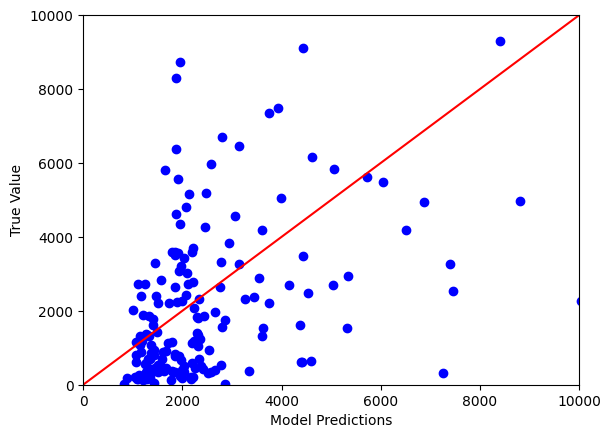

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test), y_test, color='blue') 
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color='red')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

En el gráfico anterior, la línea indica dónde estarían los puntos si la predicción fuera igual al valor real. Dado que muchos de sus puntos están bastante lejos de la línea, esto indica que el modelo no es completamente exacto. Sin embargo, parece haber alguna relación, con predicciones de modelo más altas que tienen valores verdaderos más altos.

12. Para examinar más a fondo la relación, puede utilizar la correlación. Use el método `corrcoef` de NumPy para calcular la correlación entre los valores pronosticados y reales de Revenue_2020 para los datos de prueba:

In [ ]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

El valor de correlación es aproximadamente 0,613. Esta es una relación bastante sólida, que nos dice que el modelo hace un trabajo decente al predecir los ingresos futuros del cliente en función de las transacciones del año anterior.

En este ejercicio, completó la última parte de todo el proceso de modelado predictivo: la construcción del modelo real. Tenga en cuenta que gracias a scikit-learn, la parte de construcción del modelo real se simplifica enormemente. También vio que puede derivar muy fácilmente una ecuación del modelo de regresión lineal que la empresa puede interpretar fácilmente.

Ahora también comprende que además de entrenar el modelo con los datos, hay otros pasos importantes en el proceso de modelado. La ingeniería de características es un paso clave que transforma los datos sin procesar en algo en lo que puede funcionar un modelo predictivo. El análisis de correlación es otra herramienta importante que puede ayudarnos a identificar variables que tienen un
alta asociación con la variable dependiente, y también variables que tienen poco que ver
ninguna asociación

Con toda esta comprensión y práctica práctica, resolvamos ahora otro problema usando la regresión lineal. Ayudará a la empresa de moda Azra a elegir las ubicaciones adecuadas para las próximas tiendas mediante la creación de un modelo que prediga los ingresos de las tiendas en función de la información sobre las ubicaciones de las tiendas.

### Actividad 5.02: Predicción de los ingresos de la tienda mediante regresión lineal (TAREA ALUMNO)

Vuelva a examinar el problema que estaba resolviendo anteriormente para la empresa de alta costura ZARA.

Una buena comprensión de los factores que impulsan los ingresos de una tienda será fundamental para ayudar a la empresa a decidir las ubicaciones de las próximas tiendas de una manera que maximice los ingresos generales.

Continuará trabajando en el conjunto de datos que exploró en la Actividad 5.01, Examen de la relación entre la ubicación de la tienda y los ingresos. Tienes, para cada tienda, los ingresos junto con información sobre la ubicación de la tienda. En la Actividad 5.01, Examinar
la relación entre la ubicación de la tienda y los ingresos, analizó la relación entre los ingresos de la tienda y las funciones relacionadas con la ubicación.

Ahora, construirá un modelo predictivo usando regresión lineal para predecir los ingresos de una tienda usando información sobre su ubicación. Utilizará un enfoque de división de prueba de tren para entrenar el modelo en parte de los datos y evaluar el rendimiento en datos de prueba no vistos. Evaluará el rendimiento de los datos de prueba calculando la correlación entre los valores reales y los valores previstos de los ingresos. Además,
Examinará los coeficientes del modelo para asegurarse de que el modelo tiene sentido comercial.

Complete las siguientes tareas:

1. Importe las bibliotecas necesarias y los datos de `location_rev.csv` y vea las primeras filas



In [58]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('location_rev.csv') 
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


2. Cree una variable, X, con los predictores (todas las columnas excepto ingresos) y almacene el resultado (ingresos) en una variable separada, y.


In [59]:
X = df[['num_competitors',\
        'median_income',\
        'num_loyalty_members',\
        'population_density',\
        'location_age']]
y = df['revenue']

3. Dividir los datos en un conjunto de entrenamiento y prueba. Utilice estado_aleatorio = 100.


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 100)

4. Cree un modelo de regresión lineal y ajústelo a los datos de entrenamiento.


In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

5. Imprima los coeficientes del modelo.


In [62]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

6. Imprime la intercepción del modelo.


In [63]:
model.intercept_


-51068.63644236364

7. Producir una predicción para una ubicación que tiene tres competidores; un ingreso medio de 30.000; 1.200 miembros leales; una densidad de población de 2.000; y una edad de ubicación de 10. El resultado debe ser una matriz con un solo valor
de 27573.21782447, que indica los ingresos previstos para un cliente con estos datos.


In [67]:
single_location = pd.DataFrame({'num_competitors': [3], 
                                'median_income': [30000], 
                                'num_loyalty_members': [1200], 
                                'population_density': [2000],
                                'location_age': [10]})
                                
model.predict(single_location)

array([27573.21782447])

8. Representa gráficamente las predicciones del modelo frente a los valores reales de los datos de prueba. Su trama debe verse de la siguiente manera:

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=171kOtByF7eNm8Zho9-RO5YVWxYtI4BnA' width="500" />
<figcaption>Figura 5.34: Las predicciones del modelo trazadas contra el valor verdadero</figcaption></center>
</figure>



<ipython-input-70-c697200a6e28>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 100000], [0, 100000], 'k-', color = 'red')


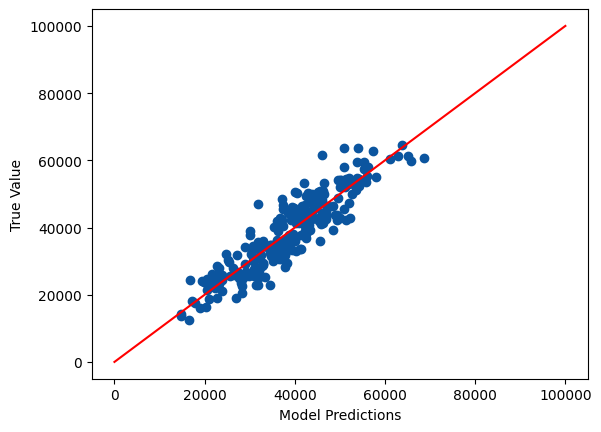

In [70]:
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'red') 
plt.show()

# De la gráfica, es evidente que existe una asociación muy fuerte entre los valores 
# predichos y reales. Esto nos dice que el modelo está haciendo un buen trabajo al 
# predecir los valores de ingresos de las tiendas. Un valor de correlación 
# cuantificará esta asociación.


9. Calcule la correlación entre las predicciones del modelo y los valores verdaderos de los datos de prueba.

El resultado debe ser alrededor de 0,91.

In [71]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])


La correlación debería estar alrededor de 0.91. En conjunto, esto confirma que su modelo también está funcionando muy bien en los datos de prueba y, por lo tanto, se puede usar de manera confiable en datos más nuevos e invisibles.